Donald Trump's tweets are downloaded from http://www.trumptwitterarchive.com/.

Here, we are using a collection of Trump tweets from 1/1/2015 to 12/31/2018.

In [34]:
# Setting working directory and reading data from csv file.
import os
os.getcwd()
os.chdir('/Users/netisheth/Documents/TextAnalytics')
import pandas as pd 
df = pd.read_csv('Trump2015-2018.csv')

In [35]:
# Fetch the first 3 records in the tweets dataframe.
df.head(3)

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for Android,@flicka__: @realDonaldTrump for president,01-01-2015 06:54:59,18,58,False,550545703932796929
1,Twitter for Android,The Mar-a-Lago Club was amazing tonight. Every...,01-01-2015 07:02:39,27,77,False,550547634218614784
2,Twitter for Android,@archangeljf12: ;@realDonaldTrump for Preside...,01-01-2015 07:04:33,24,56,False,550548111161294849


In [36]:
# Fetch the last 3 records in the tweets dataframe
df.tail(3)

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
16464,Twitter for iPhone,Heads of countries are calling wanting to know...,12-31-2018 20:02:52,20519,74566,False,1079830267274108930
16465,Twitter for iPhone,....Senator Schumer more than a year longer th...,12-31-2018 20:02:52,17027,63013,False,1079830268708556800
16466,Twitter for iPhone,HAPPY NEW YEAR! https://t.co/bHoPDPQ7G6,12-31-2018 23:53:06,32999,132907,False,1079888205351145472


In [37]:
# Total rows and columns in the dataframe (rows, column)
df.shape

(16467, 7)

In [38]:
# Let's check the datatypes of all the columns
df.dtypes

source            object
text              object
created_at        object
retweet_count      int64
favorite_count     int64
is_retweet        object
id_str             int64
dtype: object

In [39]:
# created_at column should be of datetime datatype instead of object. Let's correct the datatype
df['created_at'] = pd.to_datetime(df['created_at'])
df.dtypes

source                    object
text                      object
created_at        datetime64[ns]
retweet_count              int64
favorite_count             int64
is_retweet                object
id_str                     int64
dtype: object

In [40]:
# Let's check the content and datatype of created_at column
df['created_at'].iloc[:5]

0   2015-01-01 06:54:59
1   2015-01-01 07:02:39
2   2015-01-01 07:04:33
3   2015-01-01 07:04:45
4   2015-01-01 07:05:27
Name: created_at, dtype: datetime64[ns]

In [41]:
# We want to group our tweets by year
# Let's add a new column in the data frame for the 'year' which is derived from datetime column - creted_at
df['year'] = df['created_at'].dt.year

In [42]:
df['year'].iloc[:5]

0    2015
1    2015
2    2015
3    2015
4    2015
Name: year, dtype: int64

In [43]:
# Let's check the data frame columns and their datatypes again to identify the unnecessary columns for deletion
df.dtypes

source                    object
text                      object
created_at        datetime64[ns]
retweet_count              int64
favorite_count             int64
is_retweet                object
id_str                     int64
year                       int64
dtype: object

For our analysis, we dont need the following columns - source, date, is_retweet, id_str. 

Lets remove them from the dataframe and rename the remaining columns.

In [44]:
# Dropping and renaming the columns
df = df.drop(columns='source')
df = df.drop(columns='is_retweet')
df = df.drop(columns='id_str')
df = df.drop(columns='created_at')
df = df.rename(columns={'favorite_count':'likes'})
df = df.rename(columns={'retweet_count':'retweets'})
df.columns

Index(['text', 'retweets', 'likes', 'year'], dtype='object')

We can now group the tweets by year.

In [45]:
# Grouping the tweets by year
grouped_df = df.groupby('year')
grouped_df.groups.keys()

dict_keys([2015, 2016, 2017, 2018])

So, we have 4 tweets groups for years 2015, 2016, 2017 and 2018 respectively.

In [46]:
# Let's display the first 2 tweets records from each group.
grouped_df.head(2)

,text,retweets,likes,year
0,@flicka__: @realDonaldTrump for president,18,58,2015
1,The Mar-a-Lago Club was amazing tonight. Every...,27,77,2015
6634,I will be on @FoxNews live with members of my...,2108,6735,2016
6635,HAPPY NEW YEAR &amp; THANK YOU! https://t.co/Y...,3460,8581,2016
10418,TO ALL AMERICANS-#HappyNewYear &amp; many bles...,32665,126230,2017
10419,RT @DanScavino: On behalf of our next #POTUS &...,5548,0,2017
13019,The United States has foolishly given Pakistan...,101056,304676,2018
13020,Iran is failing at every level despite the ter...,29046,111467,2018


Let's create new dataframes for each year group for text analysis.

In [47]:
# Creating 4 groups for years - 2015, 2016, 2017, 2018
df_15 = grouped_df.get_group(2015)
df_16 = grouped_df.get_group(2016)
df_17 = grouped_df.get_group(2017)
df_18 = grouped_df.get_group(2018)

Now, let's get the tweetstring for each year group and clean the text for analysis.


### Year 2015 Preprocessing

In [48]:
from string import punctuation
import re

tweetstring15 =''
tweetlist15 = []

for i in df_15.index:
    tweetstring15 = tweetstring15 + ' ' + df_15.loc[i, 'text']
    tweetlist15.append(df_15.loc[i, 'text']) 

# Removing punctuation
# Removing '.' manually as strip doesn't remove the end of sentence punctuation
tweetstring15 = tweetstring15.strip(punctuation).lower().replace(".", "")

# Removing URLs (in Regex, S is a character match for non-whitespace, s matches whitespace)
tweetstring15 = re.sub(r'http\S+', ' ', tweetstring15)

tweetstring15

' @flicka__: @realdonaldtrump for president the mar-a-lago club was amazing tonight everybody was there the biggest and the hottest palm beach is so lucky to have best club in world @archangeljf12:  ;@realdonaldtrump for president of the united states! @sentedcruz vice president ;a #winningticket2016 #trumpcruz2016 @talentlesscook: @realdonaldtrump you\'re only a year away from #2016 pick a running mate happy new year @yankeejayman: @realdonaldtrump @flicka__ do u ever sleep?  not much! @joshhammer77: @realdonaldtrump happy new year sir can\'t wait for #celebrityapprentice @sparkleawin: @realdonaldtrump so excited for a new year &amp; new celeb apprentice! can\'t wait to see the trumps back in the boardroom! @danwolff22: @realdonaldtrump i believe in you to bring this country back to what it once was! mr trump for president! thanks dan! @tlowery19: @realdonaldtrump for president please! 😩 @jmcafee23: @realdonaldtrump please run for president this country needs you! @archangeljf12: @rea

In [49]:
# Get all the stop words like for, is, a, you from the nltk library
import nltk
stop_words = nltk.corpus.stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [50]:
# Let's filter out the stop words from the words list
words15 = tweetstring15.split()
words15 = [w for w in words15 if w not in stop_words]
words15 = [w for w in words15 if w not in ['amp', 'u']]
words15

['@flicka__:',
 '@realdonaldtrump',
 'president',
 'mar-a-lago',
 'club',
 'amazing',
 'tonight',
 'everybody',
 'biggest',
 'hottest',
 'palm',
 'beach',
 'lucky',
 'best',
 'club',
 'world',
 '@archangeljf12:',
 ';@realdonaldtrump',
 'president',
 'united',
 'states!',
 '@sentedcruz',
 'vice',
 'president',
 ';a',
 '#winningticket2016',
 '#trumpcruz2016',
 '@talentlesscook:',
 '@realdonaldtrump',
 'year',
 'away',
 '#2016',
 'pick',
 'running',
 'mate',
 'happy',
 'new',
 'year',
 '@yankeejayman:',
 '@realdonaldtrump',
 '@flicka__',
 'ever',
 'sleep?',
 'much!',
 '@joshhammer77:',
 '@realdonaldtrump',
 'happy',
 'new',
 'year',
 'sir',
 "can't",
 'wait',
 '#celebrityapprentice',
 '@sparkleawin:',
 '@realdonaldtrump',
 'excited',
 'new',
 'year',
 '&amp;',
 'new',
 'celeb',
 'apprentice!',
 "can't",
 'wait',
 'see',
 'trumps',
 'back',
 'boardroom!',
 '@danwolff22:',
 '@realdonaldtrump',
 'believe',
 'bring',
 'country',
 'back',
 'was!',
 'mr',
 'trump',
 'president!',
 'thanks',
 'd

In [51]:
# Create lists of Twitter handles mentined in the tweets in the year 2015
# w matches word characters a-zA-Z0-9_; W matches non-word characters
handles15 = []
for w in words15:
    if re.search(r'^@\w+', w):
        handles15.append(w)
handles15 = [re.sub(r'[!?:\.]+', '', h) for h in handles15]
handles15[0:5]

['@flicka__',
 '@realdonaldtrump',
 '@archangeljf12',
 '@sentedcruz',
 '@talentlesscook']

In [52]:
# Get Frequency distribution of handles
fd_handles15 = nltk.FreqDist(handles15)

# Plot - fd_handles15.plot(20, cumulative=False).show()

# Total no of handles
len(handles15)

12208

In [53]:
# Now that we have all the handles frequency distribution, lets remove the handles, hashtags to clean the data even more
tweetstring15 = re.sub(r'@\S+', ' ', tweetstring15)
tweetstring15 = re.sub(r'#\S+', ' ', tweetstring15)
tweetstring15 = re.sub(r'[^a-z\s]+', ' ', tweetstring15)
tweetstring15 = re.sub(r'\s\w\s', ' ', tweetstring15)
tweetstring15

'     for president the mar lago club was amazing tonight everybody was there the biggest and the hottest palm beach is so lucky to have best club in world       for president of the united states    vice president          you re only year away from   pick running mate happy new year       do ever sleep   not much      happy new year sir can wait for       so excited for new year  amp  new celeb apprentice  can wait to see the trumps back in the boardroom      believe in you to bring this country back to what it once was  mr trump for president  thanks dan      for president please        please run for president this country needs you      palm beach is one of the greatest places in the world to live        false \ntwitter for android     hey be president      hope you finally run for president that should be your new year resolution good thought    if you re interested in  balancing  work and pleasure stop  instead make your work more pleasurable               donaldtrump at one tim

In [54]:
# Instead of split, lets use ntlk tokenize this time to get all the words from the tweet string and then clean the words
words15 = nltk.tokenize.word_tokenize(tweetstring15)
words15 = [w for w in words15 if w not in stop_words]
words15 = [w for w in words15 if w not in ['amp', 'u']]
words15 = [w for w in words15 if w.isalpha()]
len(words15)

60469

In [55]:
# Get Frequency distribution of words
fd_words15 = nltk.FreqDist(words15)
fd_words15

FreqDist({'trump': 1676, 'great': 1040, 'twitter': 908, 'false': 907, 'android': 680, 'donald': 670, 'president': 567, 'america': 501, 'thank': 427, 'make': 394, ...})

We will follow the same procedure for the rest of the years - 2016, 2017, 2018

### Year 2016 Preprocessing

In [56]:
tweetstring16 =''
tweetlist16 = []

for i in df_16.index:
    tweetstring16 = tweetstring16 + ' ' + df_16.loc[i, 'text']
    tweetlist16.append(df_16.loc[i, 'text']) 

# Removing punctuation
tweetstring16 = tweetstring16.strip(punctuation).lower().replace(".", "")

# Removing URLs 
tweetstring16 = re.sub(r'http\S+', ' ', tweetstring16)

# Let's filter out the stop words from the words list
words16 = tweetstring16.split()
words16 = [w for w in words16 if w not in stop_words]
words16 = [w for w in words16 if w not in ['amp', 'u']]
words16

# Create lists of Twitter handles mentined in the tweets in the year 2016
handles16 = []
for w in words16:
    if re.search(r'^@\w+', w):
        handles16.append(w)
handles16 = [re.sub(r'[!:?\.]+', '', h) for h in handles16]

# Get Frequency distribution of handles
fd_handles16 = nltk.FreqDist(handles16)

# Now that we have all the handles frequency distribution, lets remove the handles, hashtags to clean the data even more
tweetstring16 = re.sub(r'@\S+', ' ', tweetstring16)
tweetstring16 = re.sub(r'#\S+', ' ', tweetstring16)
tweetstring16 = re.sub(r'[^a-z\s]+', ' ', tweetstring16)
tweetstring16 = re.sub(r'\s\w\s', ' ', tweetstring16)

# Instead of split, lets use ntlk tokenize this time to get all the words from the tweet string and then clean the words
words16 = nltk.tokenize.word_tokenize(tweetstring16)
words16 = [w for w in words16 if w not in stop_words]
words16 = [w for w in words16 if w not in ['amp', 'u']]
words16 = [w for w in words16 if w.isalpha()]

# Get Frequency distribution of words
fd_words16 = nltk.FreqDist(words16)

### Year 2017 Preprocessing

In [57]:
tweetstring17 =''
tweetlist17 = []

for i in df_17.index:
    tweetstring17 = tweetstring17 + ' ' + df_17.loc[i, 'text']
    tweetlist17.append(df_17.loc[i, 'text']) 

# Removing punctuation
tweetstring17 = tweetstring17.strip(punctuation).lower().replace(".", "")

# Removing URLs 
tweetstring17 = re.sub(r'http\S+', ' ', tweetstring17)

# Let's filter out the stop words from the words list
words17 = tweetstring17.split()
words17 = [w for w in words17 if w not in stop_words]
words17 = [w for w in words17 if w not in ['amp', 'u']]
words17

# Create lists of Twitter handles mentined in the tweets in the year 2017
handles17 = []
for w in words17:
    if re.search(r'^@\w+', w):
        handles17.append(w)
handles17 = [re.sub(r'[:!?\.]+', '', h) for h in handles17]

# Get Frequency distribution of handles
fd_handles17 = nltk.FreqDist(handles17)

# Now that we have all the handles frequency distribution, lets remove the handles, hashtags to clean the data even more
tweetstring17 = re.sub(r'@\S+', ' ', tweetstring17)
tweetstring17 = re.sub(r'#\S+', ' ', tweetstring17)
tweetstring17 = re.sub(r'[^a-z\s]+', ' ', tweetstring17)
tweetstring17 = re.sub(r'\s\w\s', ' ', tweetstring17)

# Instead of split, lets use ntlk tokenize this time to get all the words from the tweet string and then clean the words
words17 = nltk.tokenize.word_tokenize(tweetstring17)
words17 = [w for w in words17 if w not in stop_words]
words17 = [w for w in words17 if w not in ['amp', 'u']]
words17 = [w for w in words17 if w.isalpha()]

# Get Frequency distribution of words
fd_words17 = nltk.FreqDist(words17)

### Year 2018 Preprocessing

In [58]:
tweetstring18 =''
tweetlist18 = []

for i in df_18.index:
    tweetstring18 = tweetstring18 + ' ' + df_18.loc[i, 'text']
    tweetlist18.append(df_18.loc[i, 'text']) 

# Removing punctuation
tweetstring18 = tweetstring18.strip(punctuation).lower().replace(".", "")

# Removing URLs 
tweetstring18 = re.sub(r'http\S+', ' ', tweetstring18)

# Let's filter out the stop words from the words list
words18 = tweetstring18.split()
words18 = [w for w in words18 if w not in stop_words]
words18 = [w for w in words18 if w not in ['amp', 'u']]
words18

# Create lists of Twitter handles mentined in the tweets in the year 2018
handles18 = []
for w in words18:
    if re.search(r'^@\w+', w):
        handles18.append(w)
handles18 = [re.sub(r'[!:?\.]+', '', h) for h in handles18]

# Get Frequency distribution of handles
fd_handles18 = nltk.FreqDist(handles18)

# Now that we have all the handles frequency distribution, lets remove the handles, hashtags to clean the data even more
tweetstring18 = re.sub(r'@\S+', ' ', tweetstring18)
tweetstring18 = re.sub(r'#\S+', ' ', tweetstring18)
tweetstring18 = re.sub(r'[^a-z\s]+', ' ', tweetstring18)
tweetstring18 = re.sub(r'\s\w\s', ' ', tweetstring18)

# Instead of split, lets use ntlk tokenize this time to get all the words from the tweet string and then clean the words
words18 = nltk.tokenize.word_tokenize(tweetstring18)
words18 = [w for w in words18 if w not in stop_words]
words18 = [w for w in words18 if w not in ['amp', 'u']]
words18 = [w for w in words18 if w.isalpha()]

# Get Frequency distribution of words
fd_words18 = nltk.FreqDist(words18)

## Analysis of frequently tweeted words - top 15

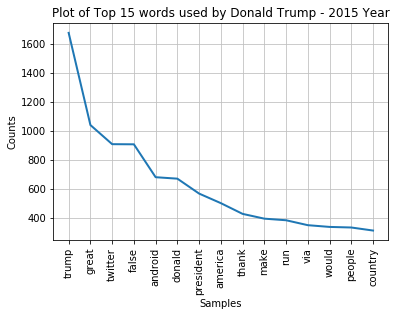

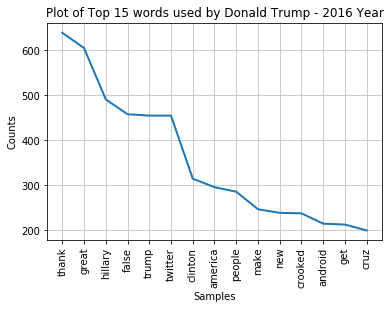

In [59]:
# Year 2015
import matplotlib.pyplot as plot
fd_words15.plot(15, cumulative=False, title='Plot of Top 15 words used by Donald Trump - 2015 Year')
# Year 2016
fd_words16.plot(15, cumulative=False, title='Plot of Top 15 words used by Donald Trump - 2016 Year')

In the year 2015 and 2016, Donald Trump was not the President. We can observe from the graphs that the most commonly used words inlcude America, make, great etc. The most common phrase might have been - "Let's make America great again". Just an example.

It is interesting to know that in the year 2016, when Trump was conteding against Hilary Clinton, words Hilary and Clinton are a part of the most commonly used words. 

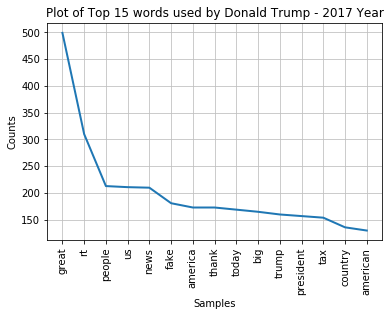

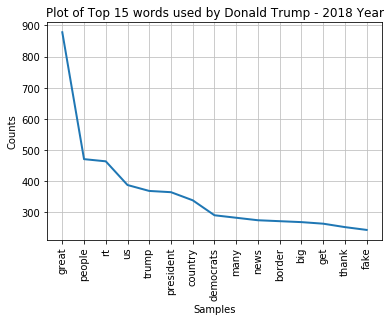

In [60]:
# Year 2017
fd_words17.plot(15, cumulative=False, title='Plot of Top 15 words used by Donald Trump - 2017 Year')
# Year 2018
fd_words18.plot(15, cumulative=False, title='Plot of Top 15 words used by Donald Trump - 2018 Year')

After Trump bacame the president, words like President, people, country, democrats, news, thank have been used commonly in the tweets which is expected. 

It seems like Great is one of the favorite words for President.

## Analysis of frequently mentioned twitter handles - top 15

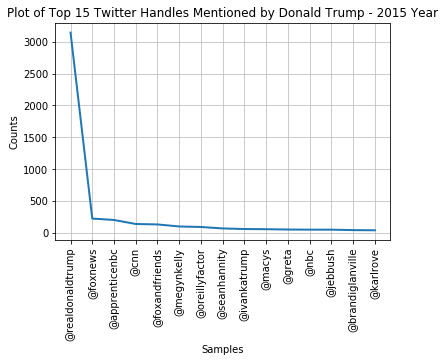

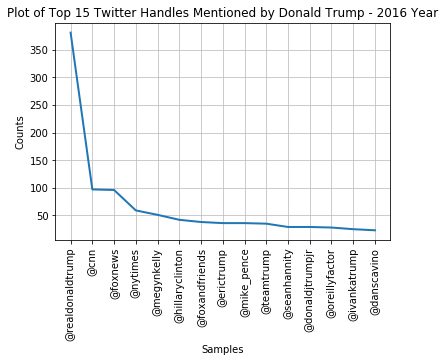

In [61]:
# Year 2015
fd_handles15.plot(15, cumulative=False, title='Plot of Top 15 Twitter Handles Mentioned by Donald Trump - 2015 Year')
# Year 2016
fd_handles16.plot(15, cumulative=False, title='Plot of Top 15 Twitter Handles Mentioned by Donald Trump - 2016 Year')

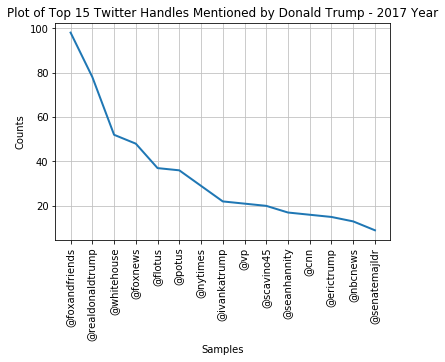

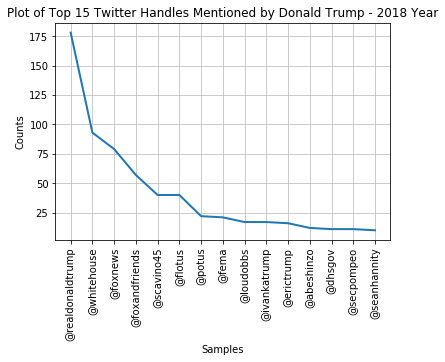

In [62]:
# Year 2017
fd_handles17.plot(15, cumulative=False, title='Plot of Top 15 Twitter Handles Mentioned by Donald Trump - 2017 Year')
# Year 2018
fd_handles18.plot(15, cumulative=False, title='Plot of Top 15 Twitter Handles Mentioned by Donald Trump - 2018 Year')

From the graphs above we can observe the trend of how President Donald Trump has mentioned twitter handels in his tweets over the years. 

For example, @realdonaldtrump is the the most commonly used twitter handle (#1 Ranking) throughout 2015-2018. 

The top 15 twitter handles in all the 4 years overlap each other.
For example:
- @foxnews and @realdonaldtrump are in top 15 for all the 4 years.
- @cnn has been in the top 15 for the year 2015, 2016 and 2017
- @whitehouse has been in the top 15 in the year 2017 and 2018 (after Donald Trump became the President)

The ranking in the top 15 have changed but the trends are interesting to know. 

## Sentimental Analysis using NLTK 

In [63]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

def get_polarity(tweetlist):
    sentiment = {}
    analyzer = SentimentIntensityAnalyzer()
    polarity = [0]*len(tweetlist)
    for i, tweet in enumerate(tweetlist):
        tweet = tweet.strip(punctuation).lower()
        tweet = re.sub(r'http\S+', ' ', tweet)
        sentiment[i] = analyzer.polarity_scores(tweet)
        polarity[i] = sentiment[i]['compound']
        
    return polarity

df_15['polarity'] = get_polarity(tweetlist15)
df_16['polarity'] = get_polarity(tweetlist16)
df_17['polarity'] = get_polarity(tweetlist17)
df_18['polarity'] = get_polarity(tweetlist18)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/i

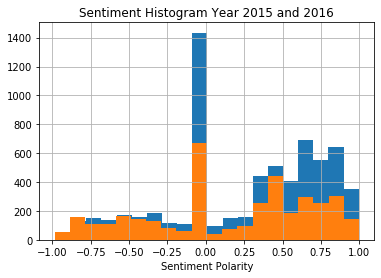

In [64]:
plt.title('Sentiment Histogram Year 2015 and 2016')
plt.xlabel('Sentiment Polarity')
df_15['polarity'].hist(bins=20) #blue
df_16['polarity'].hist(bins=20) #orange

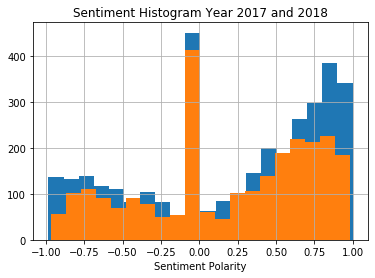

In [65]:
plt.title('Sentiment Histogram Year 2017 and 2018')
plt.xlabel('Sentiment Polarity')
df_18['polarity'].hist(bins=20) # blue
df_17['polarity'].hist(bins=20) # orange

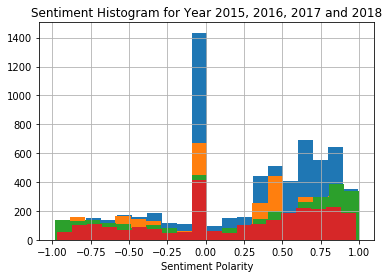

In [66]:
plt.title('Sentiment Histogram for Year 2015, 2016, 2017 and 2018')
plt.xlabel('Sentiment Polarity')
df_15['polarity'].hist(bins=20) # blue
df_16['polarity'].hist(bins=20) # orange
df_18['polarity'].hist(bins=20) # green
df_17['polarity'].hist(bins=20) # red

From the graphs above we can observe how the sentiment in the tweets have changed over the years. 

For all the years, we can see that President Donald Trump has used more neutral words than positive or negative.
But if we are only talking about positive or negative sentiment - The words in the tweets are more positive than negative.